In [1]:
import os,glob
import numpy as np
import pandas as pd
import glob
import pyslha
import time
import progressbar as P
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
import pyslha
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

delphesDir = os.path.abspath("../DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')


Welcome to JupyROOT 6.28/06


True

In [62]:
# inputFile = '../pp2BB1j_cms_test/Events/run_02/cdfo_530_500.0_tau_5e-02_delphes_events.root'
inputFile = '../DelphesLLP/test.root'
inputFile2 = '../DelphesLLP/test_noDisp2.root'

In [63]:
f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()

pTj1 = []
for ievt in range(nevts):
    tree.GetEntry(ievt)
    jets = [tree.Jet.At(ij) for ij in range(tree.Jet.GetEntries())]
    if len(jets) > 0:        
        pTj1.append(max([j.PT for j in jets]))

In [64]:
f = ROOT.TFile(inputFile2,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()

pTj1B = []
for ievt in range(nevts):
    tree.GetEntry(ievt)
    jets = [tree.Jet.At(ij) for ij in range(tree.Jet.GetEntries())]
    if len(jets) > 0:        
        pTj1B.append(max([j.PT for j in jets]))

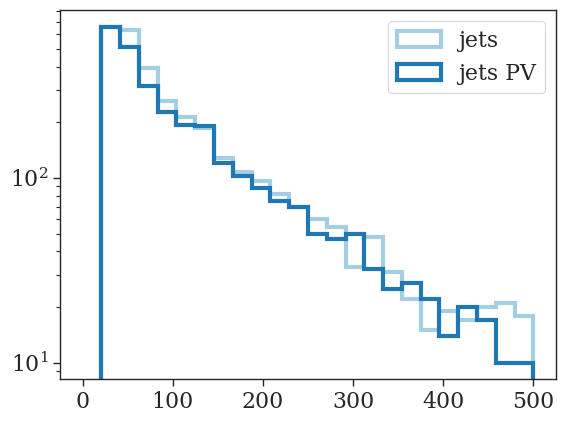

In [65]:
bins = np.linspace(0.,500.,25)
plt.hist(pTj1,bins=bins,label='jets',histtype='step',linewidth=3)
plt.hist(pTj1B,bins=bins,label='jets PV',histtype='step',linewidth=3)
plt.yscale('log')
plt.legend()
plt.show()

In [66]:
f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
ievt = 1
tree.GetEntry(ievt)
jets = [tree.Jet.At(ij) for ij in range(tree.Jet.GetEntries())]
daughters = [tree.bsmDirectDaughters.At(ip) for ip in range(tree.bsmDirectDaughters.GetEntries())]

f2 = ROOT.TFile(inputFile2,'read')
tree2 = f2.Get("Delphes")
tree2.GetEntry(ievt)
jets2 = [tree2.Jet.At(ij) for ij in range(tree2.Jet.GetEntries())]
daughters2 = [tree2.bsmDirectDaughters.At(ip) for ip in range(tree2.bsmDirectDaughters.GetEntries())]

In [67]:
print('Jets (all):')
for j in jets:
    print(j.PT,j.Particles.GetEntries(),j.Constituents.GetEntries())
    print('eta = %1.2f, phi = %1.2f \n' %(j.Eta,j.Phi))

print('\nJets (PV):')
for j in jets2:
    print(j.PT,j.Particles.GetEntries(),j.Constituents.GetEntries())
    print('eta = %1.2f, phi = %1.2f \n' %(j.Eta,j.Phi))


Jets (all):
58.03624725341797 12 12
eta = 0.11, phi = 1.90 

32.78207778930664 9 7
eta = -0.10, phi = 2.55 

26.70466423034668 9 9
eta = 0.98, phi = 1.88 


Jets (PV):
53.89353561401367 12 12
eta = 0.11, phi = 1.90 

37.55442810058594 9 7
eta = -0.09, phi = 2.59 



In [68]:
for d in daughters:
    print(d.PID,d.PT,np.sqrt(d.X**2 + d.Y**2))
    print('eta = %1.2f, phi = %1.2f \n' %(d.Eta,d.Phi))

5 15.119561195373535 7.047347018033538
eta = -1.27, phi = 0.14 

1000022 497.3228759765625 7.047347018033538
eta = -0.18, phi = -0.98 

-5 28.778432846069336 8.3618081233167
eta = 1.03, phi = 1.89 

1000022 394.6347961425781 8.3618081233167
eta = 0.24, phi = 2.24 



In [40]:
for d in daughters2:
    print(d.PID,d.PT,np.sqrt(d.X**2 + d.Y**2))

5 15.119561195373535 7.047347018033538
1000022 497.3228759765625 7.047347018033538
-5 28.778432846069336 8.3618081233167
1000022 394.6347961425781 8.3618081233167
